In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

import xgboost as xgb
import joblib
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Step 2: Load the Framingham Heart Study dataset

# Load CSV from data folder
data_path = r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\data\framingham.csv"
df = pd.read_csv(data_path)

# Display first 5 rows
print("Sample records:")
display(df.head())

Sample records:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# Basic info
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 K

In [4]:
df.shape

(4240, 16)

In [5]:
print(df.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [6]:
# Check class distribution
print("\nTarget Variable (TenYearCHD) Distribution:")
print(df["TenYearCHD"].value_counts(normalize=True) * 100)


Target Variable (TenYearCHD) Distribution:
TenYearCHD
0    84.811321
1    15.188679
Name: proportion, dtype: float64


Class distribution:
 TenYearCHD
0    3596
1     644
Name: count, dtype: int64


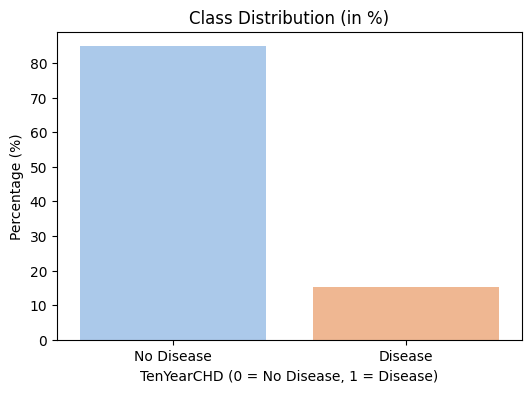

In [7]:
# Class distribution
target_counts = df['TenYearCHD'].value_counts()
print("Class distribution:\n", target_counts)

# Plot as percentage
plt.figure(figsize=(6,4))
sns.barplot(x=target_counts.index, y=target_counts.values / len(df) * 100, palette='pastel')
plt.title("Class Distribution (in %)")
plt.xlabel("TenYearCHD (0 = No Disease, 1 = Disease)")
plt.ylabel("Percentage (%)")
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

In [8]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
missing = df.isnull().sum()
print(missing)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [10]:
# Filling column 'education' with mode - the most common value
df['education'] = df['education'].fillna(df['education'].mode()[0])# mode() returns a Series for mode( 0 1 ), so we use [0] to get the first most frequent value

# Filling numeric columns with median - the middle value(cause it is not affected by outliers)
for col in ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']:
    df[col] = df[col].fillna(df[col].median())

# Filling 'BPMeds' with 0 assuming not on meds
df['BPMeds'] = df['BPMeds'].fillna(0)

# Verifying no missing values remain
print("Total missing values left:", df.isnull().sum().sum())

Total missing values left: 0


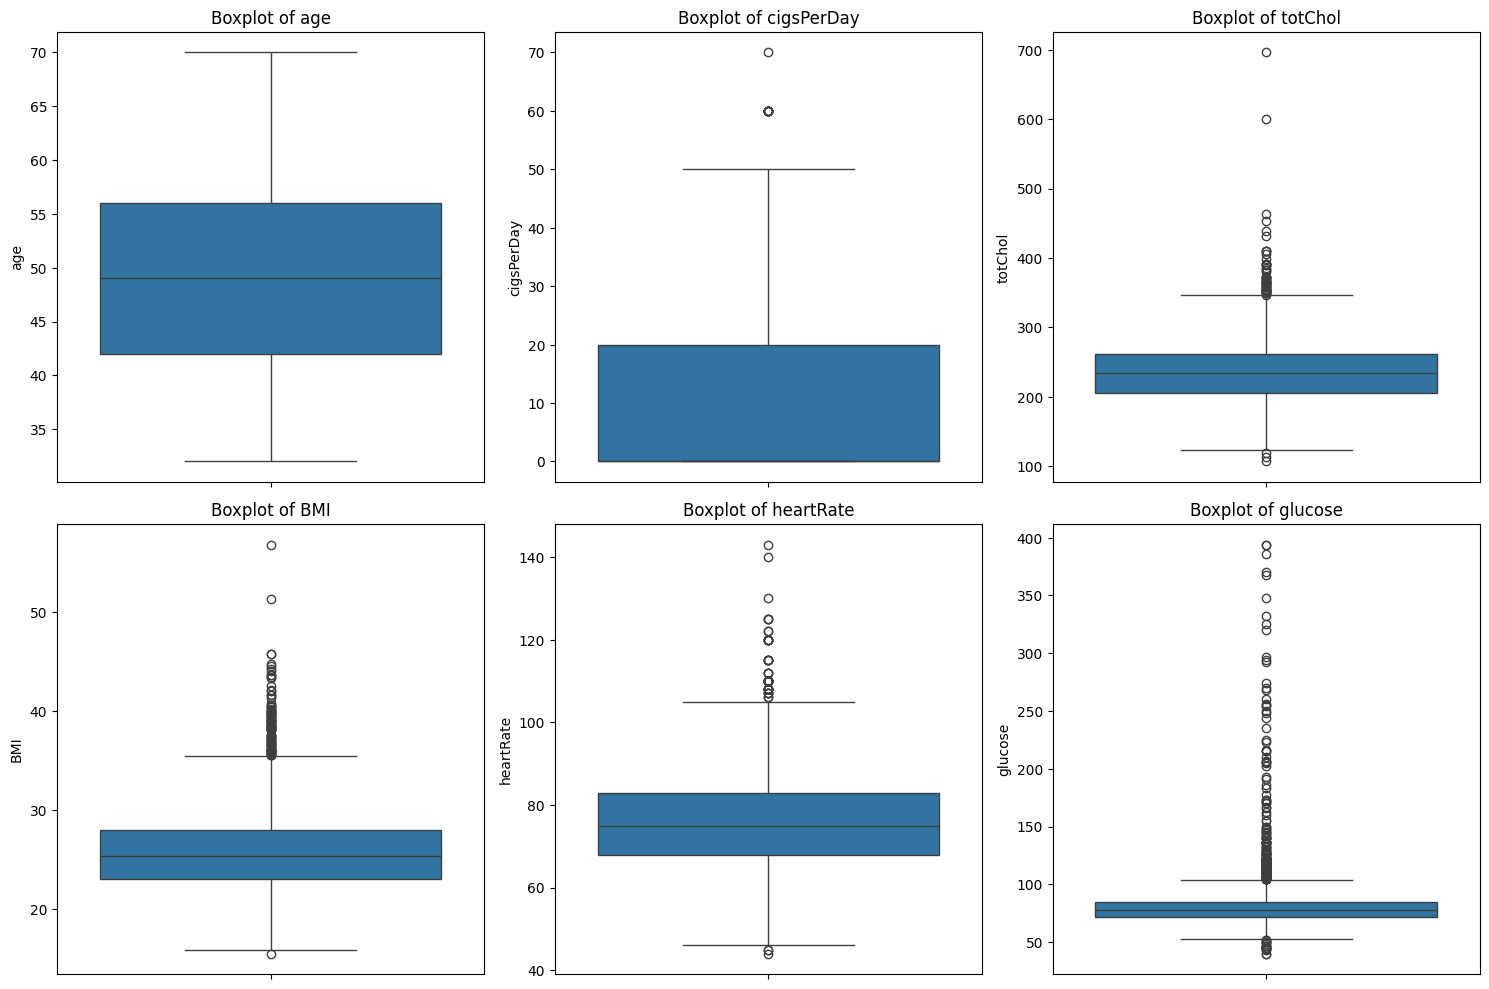

In [11]:
# FOR DETECTING OUTLIERS
# List of numeric features to check
num_cols = ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']

# Plot boxplots to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [12]:
# Step 11: Handle outliers using IQR clipping

# Define function to clip outliers
def clip_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Apply to relevant numeric columns
for col in ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']:
    clip_outliers_iqr(col)

print("Outliers handled using IQR clipping.")


Outliers handled using IQR clipping.


In [13]:
# Step 12: Encode 'education' (ordinal categorical feature)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])

print("'education' feature encoded.")

'education' feature encoded.


In [14]:
# Step 13: Scale features using StandardScaler

from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Initialize scaler and scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features scaled.")


Features scaled.


In [15]:
print(X.dtypes)

male                 int64
age                  int64
education            int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
dtype: object


In [15]:
# Step 14: Train-Test Split

from sklearn.model_selection import train_test_split

# Split the scaled features
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data split complete: {X_train.shape[0]} train samples, {X_test.shape[0]} test samples.")

Data split complete: 3392 train samples, 848 test samples.


In [16]:
# Step 15: Train XGBoost classifier

# Create the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

print("XGBoost model trained successfully.")


XGBoost model trained successfully.


Accuracy:      0.8184
Precision:     0.2449
Recall:        0.0930
F1 Score:      0.1348
ROC-AUC Score: 0.6171
Sensitivity:   0.0930
Specificity:   0.9485


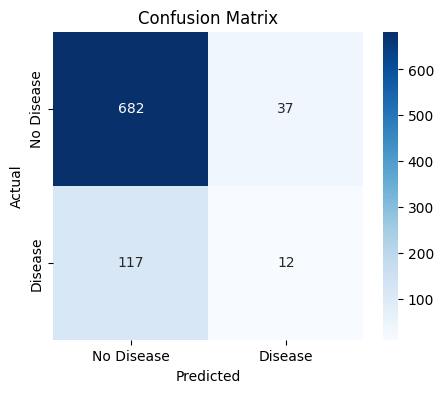

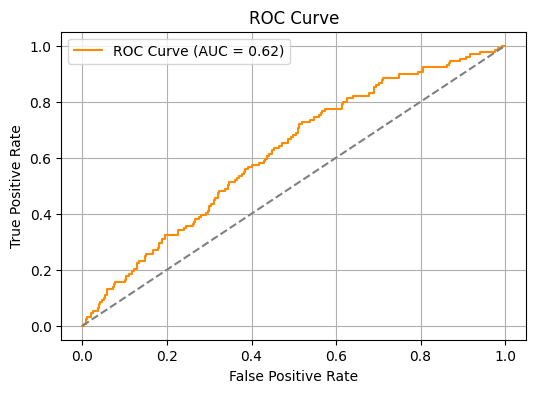

In [17]:
# Step 16: Evaluate the model

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


# Print results
print(f"Accuracy:      {acc:.4f}")
print(f"Precision:     {prec:.4f}")
print(f"Recall:        {rec:.4f}")
print(f"F1 Score:      {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Sensitivity:   {sensitivity:.4f}")
print(f"Specificity:   {specificity:.4f}")

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# We are using CTGAN because the dataset is imbalanced (very few Class 1 - Disease cases).
# CTGAN is designed for tabular data and allows conditional generation of specific classes.
# This helps us generate more samples only for Class 1 to balance the dataset before training.

In [22]:
# CTGAN is used to generate synthetic tabular data for the minority class (TenYearCHD = 1)
# so that we can balance the dataset and improve model performance on imbalanced data.

In [18]:
missing = df.isnull().sum()
print(missing)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [19]:
# Step 17: Train CTGAN on class 1 (TenYearCHD == 1)

from ctgan import CTGAN
import pandas as pd

# Extract class 1 samples (positive cases)
df_positive = df[df['TenYearCHD'] == 1].copy()

# Drop the target for training CTGAN
df_positive_nolabel = df_positive.drop('TenYearCHD', axis=1)

# Initialize CTGAN
ctgan = CTGAN(epochs=300)  #can adjust epochs

# Fit the GAN
ctgan.fit(df_positive_nolabel)

print("CTGAN training complete.")


CTGAN training complete.


In [20]:
df_positive_nolabel.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3,0,61,2,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
6,0,63,0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0
15,0,38,1,1,20.0,0.0,0,1,0,221.0,140.0,90.0,21.35,95.0,70.0
17,0,46,1,1,20.0,0.0,0,0,0,291.0,112.0,78.0,23.38,80.0,89.0
25,1,47,3,1,20.0,0.0,0,0,0,294.0,102.0,68.0,24.18,62.0,66.0


In [21]:
# Step 18: Generate synthetic samples and balance the dataset

# Count of class 0 samples
num_class_0 = len(df[df['TenYearCHD'] == 0])
print("Original Class 0 count:", num_class_0)

# Number of synthetic samples needed to balance
num_synthetic = num_class_0 - len(df_positive)
print("Synthetic samples to generate:", num_synthetic)

# Generate synthetic samples
synthetic_samples = ctgan.sample(num_synthetic)

# Add target label back to synthetic samples
synthetic_samples['TenYearCHD'] = 1

# Combine original class 0 + synthetic class 1
df_class_0 = df[df['TenYearCHD'] == 0].copy()
df_balanced = pd.concat([df_class_0, synthetic_samples], ignore_index=True)

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the new balanced dataset
save_path = r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\data\framingham_balanced_xgboost.csv"
df_balanced.to_csv(save_path, index=False)

print(f"Balanced dataset saved as: framingham_balanced_xgboost.csv")
print("New shape:", df_balanced.shape)
print("Class distribution:\n", df_balanced['TenYearCHD'].value_counts())


Original Class 0 count: 3596
Synthetic samples to generate: 2952
Balanced dataset saved as: framingham_balanced_xgboost.csv
New shape: (6548, 16)
Class distribution:
 TenYearCHD
0    3596
1    2952
Name: count, dtype: int64


In [22]:
# Step 19: Load the balanced dataset
balanced_path = r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\data\framingham_balanced_xgboost.csv"
df_balanced = pd.read_csv(balanced_path)

print("Balanced data preview:")
display(df_balanced.head())

# Encode 'education' (ordinal)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_balanced['education'] = le.fit_transform(df_balanced['education'])

# Separate features and target
X = df_balanced.drop("TenYearCHD", axis=1)
y = df_balanced["TenYearCHD"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

print("Balanced dataset ready for training.")


Balanced data preview:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,36,0,1,20.00000,0.000000,0,0,0,203.000000,101.500000,67.000000,24.430000,65.000000,74.000000,0
1,0,54,1,0,0.00000,0.000000,0,1,0,302.000000,210.000000,127.500000,31.980000,68.000000,79.000000,0
2,1,54,3,1,2.11172,0.005008,0,1,0,341.282059,102.165906,112.653023,31.711744,69.776198,82.992236,1
3,0,34,2,1,10.00000,0.000000,0,0,0,206.000000,101.000000,63.000000,21.500000,75.000000,66.000000,0
4,0,46,0,1,20.00000,0.000000,0,0,0,212.000000,122.500000,75.500000,23.510000,67.000000,103.000000,0


Balanced dataset ready for training.


In [23]:
# Step 20: Train XGBoost on balanced data

# Initialize the XGBoost Classifier
model_balanced = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train the model
model_balanced.fit(X_train, y_train)

print("XGBoost model trained on balanced dataset.")


XGBoost model trained on balanced dataset.


Model Evaluation Metrics:
Accuracy     : 0.9985
Precision    : 1.0000
Recall       : 0.9966
F1 Score     : 0.9983
ROC AUC      : 1.0000
Sensitivity  : 0.9966
Specificity  : 1.0000


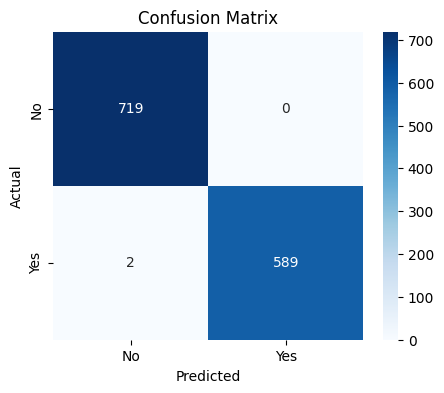

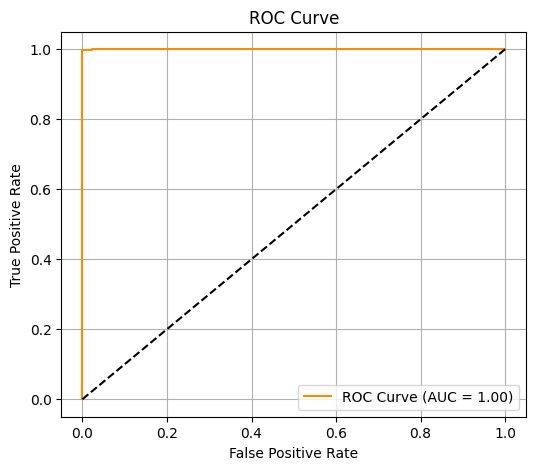

In [24]:
# Step 21: Evaluate the XGBoost model (balanced)

# Predictions
y_pred_bal = model_balanced.predict(X_test)
y_proba_bal = model_balanced.predict_proba(X_test)[:, 1]

# Basic metrics
acc = accuracy_score(y_test, y_pred_bal)
prec = precision_score(y_test, y_pred_bal)
rec = recall_score(y_test, y_pred_bal)
f1 = f1_score(y_test, y_pred_bal)
roc_auc = roc_auc_score(y_test, y_proba_bal)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_bal)
tn, fp, fn, tp = cm.ravel()

# Sensitivity and Specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print scores
print("Model Evaluation Metrics:")
print(f"Accuracy     : {acc:.4f}")
print(f"Precision    : {prec:.4f}")
print(f"Recall       : {rec:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"ROC AUC      : {roc_auc:.4f}")
print(f"Sensitivity  : {sensitivity:.4f}")
print(f"Specificity  : {specificity:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_bal)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [26]:
import joblib

# Save model
model_path = r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\xgboost_model.pkl"
joblib.dump(model_balanced, model_path)
print(f"Model saved at: {model_path}")

# Save scaler
scaler_path = r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\scaler_xgboost.pkl"
joblib.dump(scaler, scaler_path)
print(f"Scaler saved at: {scaler_path}")

Model saved at: C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\xgboost_model.pkl
Scaler saved at: C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\scaler_xgboost.pkl


In [27]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.955189,0.494104,8.913679,0.029245,0.005896,0.310613,0.025708,236.170047,132.354599,82.897759,25.714098,75.750708,79.450472,0.151887
std,0.495027,8.572942,1.018522,0.500024,11.783496,0.168513,0.076569,0.462799,0.158280,42.299175,22.033300,11.910394,3.787978,11.622274,11.453158,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.000000,83.500000,48.000000,15.645000,45.500000,52.500000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,2.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,3.000000,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,346.000000,295.000000,142.500000,35.465000,105.500000,104.500000,1.000000


In [37]:
import joblib
import numpy as np

# Load saved model and scaler
model = joblib.load(r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\xgboost_model.pkl")
scaler = joblib.load(r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\scaler_xgboost.pkl")

# Get user input
print("Please enter the following details:")
male = int(input("Gender (0 = Female, 1 = Male): "))
age = float(input("Age: "))
education = int(input("Education (1–4): "))
currentSmoker = int(input("Currently Smokes? (0 = No, 1 = Yes): "))
cigsPerDay = float(input("Cigarettes per day: "))
BPMeds = int(input("On BP Medication? (0 = No, 1 = Yes): "))
prevalentStroke = int(input("History of Stroke? (0 = No, 1 = Yes): "))
prevalentHyp = int(input("History of Hypertension? (0 = No, 1 = Yes): "))
diabetes = int(input("Has Diabetes? (0 = No, 1 = Yes): "))
totChol = float(input("Total Cholesterol: "))
sysBP = float(input("Systolic BP: "))
diaBP = float(input("Diastolic BP: "))
BMI = float(input("BMI: "))
heartRate = float(input("Heart Rate: "))
glucose = float(input("Glucose Level: "))

# Combine into array
user_data = np.array([[male, age, education, currentSmoker, cigsPerDay,
                       BPMeds, prevalentStroke, prevalentHyp, diabetes,
                       totChol, sysBP, diaBP, BMI, heartRate, glucose]])

# Scale the input
user_data_scaled = scaler.transform(user_data)

# Predict
prediction = model.predict(user_data_scaled)

# Output result
print("\nPrediction Result:")
if prediction[0] == 1:
    print("High risk of developing cardiovascular disease (within 10 years).")
else:
    print("Low risk of developing cardiovascular disease (within 10 years).")


Please enter the following details:

Prediction Result:
Low risk of developing cardiovascular disease (within 10 years).


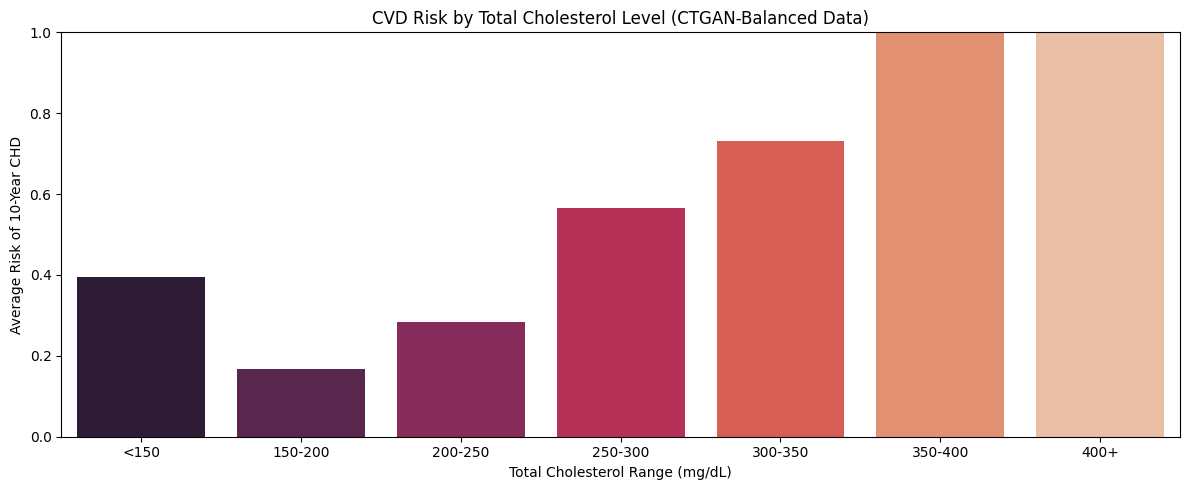

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load model and scaler
model = joblib.load(r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\xgboost_model.pkl")
scaler = joblib.load(r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\scaler_xgboost.pkl")

# Load the balanced dataset
df = pd.read_csv(r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\data\framingham_balanced_xgboost.csv")

# Prepare features
X = df.drop("TenYearCHD", axis=1)
X_scaled = scaler.transform(X)

# Get predicted probabilities (risk scores)
df["Predicted_Risk"] = model.predict_proba(X_scaled)[:, 1]

# Define cholesterol bins and labels
chol_bins = [0, 150, 200, 250, 300, 350, 400, np.inf]
chol_labels = ['<150', '150-200', '200-250', '250-300', '300-350', '350-400', '400+']
df["chol_bin"] = pd.cut(df["totChol"], bins=chol_bins, labels=chol_labels, right=False)

# Group by bin and calculate average predicted risk
chol_risk = df.groupby("chol_bin")["Predicted_Risk"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(data=chol_risk, x="chol_bin", y="Predicted_Risk", palette="rocket")
plt.ylim(0, 1)
plt.title("CVD Risk by Total Cholesterol Level (CTGAN-Balanced Data)")
plt.xlabel("Total Cholesterol Range (mg/dL)")
plt.ylabel("Average Risk of 10-Year CHD")
plt.tight_layout()
plt.show()

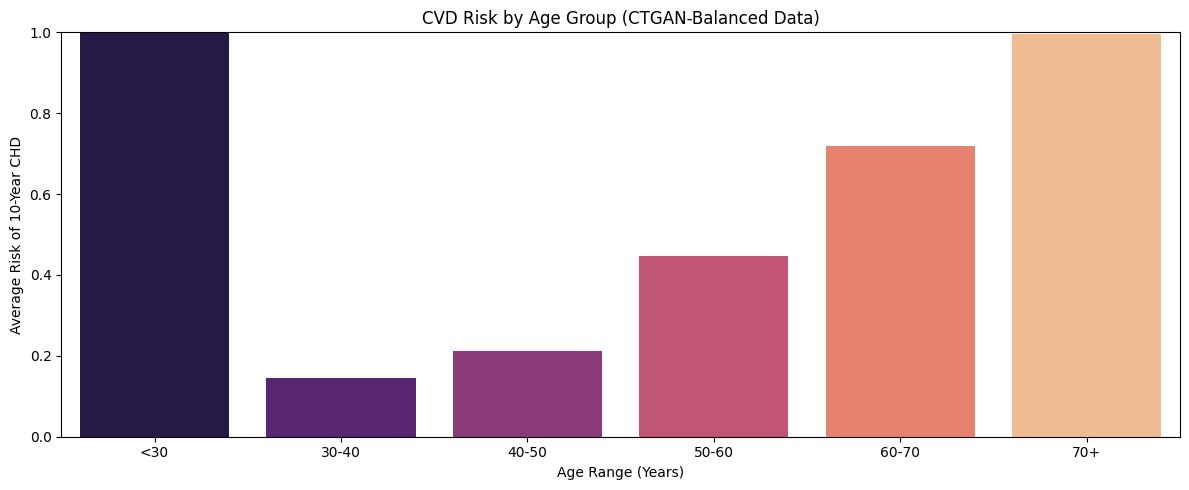

In [29]:
# Define age bins and labels
age_bins = [0, 30, 40, 50, 60, 70, np.inf]
age_labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70+']
df["age_bin"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=False)

# Group by age_bin and calculate average predicted risk
age_risk = df.groupby("age_bin")["Predicted_Risk"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(data=age_risk, x="age_bin", y="Predicted_Risk", palette="magma")
plt.ylim(0, 1)
plt.title("CVD Risk by Age Group (CTGAN-Balanced Data)")
plt.xlabel("Age Range (Years)")
plt.ylabel("Average Risk of 10-Year CHD")
plt.tight_layout()
plt.show()


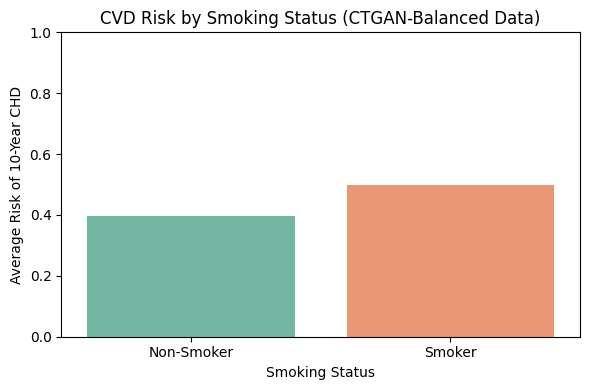

In [30]:
# Group by smoker status and calculate average predicted risk
smoke_risk = df.groupby("currentSmoker")["Predicted_Risk"].mean().reset_index()
smoke_risk["Smoking_Status"] = smoke_risk["currentSmoker"].map({0: "Non-Smoker", 1: "Smoker"})

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=smoke_risk, x="Smoking_Status", y="Predicted_Risk", palette="Set2")
plt.ylim(0, 1)
plt.title("CVD Risk by Smoking Status (CTGAN-Balanced Data)")
plt.xlabel("Smoking Status")
plt.ylabel("Average Risk of 10-Year CHD")
plt.tight_layout()
plt.show()


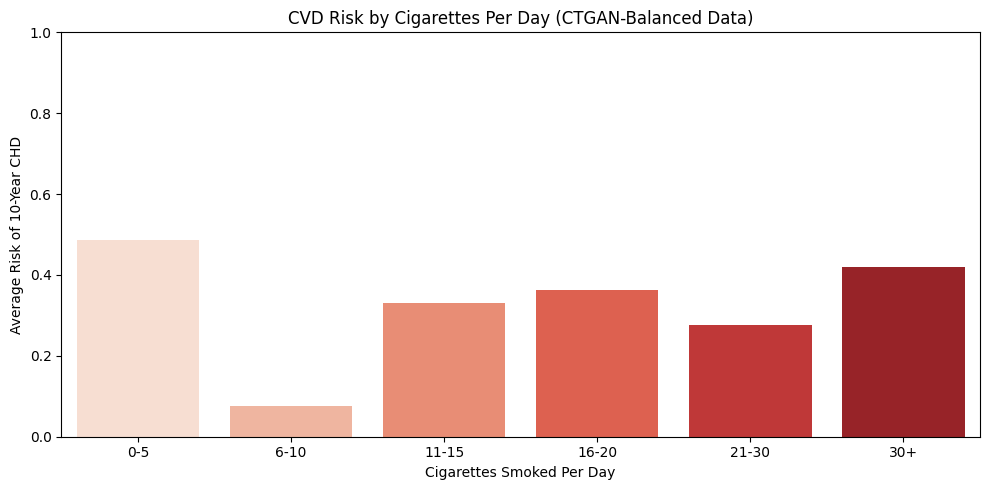

In [33]:
# Bin cigsPerDay values
bins = [0, 5, 10, 15, 20, 30, np.inf]
labels = ['0-5', '6-10', '11-15', '16-20', '21-30', '30+']
df['cigs_bin'] = pd.cut(df['cigsPerDay'], bins=bins, labels=labels, right=False)

# Group and calculate risk
cigs_risk = df.groupby('cigs_bin')['Predicted_Risk'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=cigs_risk, x='cigs_bin', y='Predicted_Risk', palette='Reds')
plt.ylim(0, 1)
plt.title("CVD Risk by Cigarettes Per Day (CTGAN-Balanced Data)")
plt.xlabel("Cigarettes Smoked Per Day")
plt.ylabel("Average Risk of 10-Year CHD")
plt.tight_layout()
plt.show()
